<a href="https://colab.research.google.com/github/RudraKhare/British-Airways-Internship/blob/main/British_Airways_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.



In [60]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [61]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways" #base_url: This variable stores the base URL of the website where the reviews are located.
pages = 100#pages: This variable determines the number of pages to scrape. In this case, it's set to 10, indicating that the script will scrape 10 pages of reviews.
page_size = 100 #This variable determines the number of reviews to scrape per page. It's set to 100, indicating that each page will contain up to 100 reviews.

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data #{base_url}: This is a placeholder that gets replaced with the value of the base_url variable, which is the base URL of the website where the reviews are located.

    # /page/{i}/: This part of the URL represents the pagination feature. {i} is a placeholder that gets replaced with the current page number in each iteration of the loop.

    # ?sortby=post_date%3ADesc: This part adds a query parameter to the URL indicating that the reviews should be sorted by post date in descending order. %3ADesc represents the URL encoded form of the string :Desc. This is necessary because URLs cannot contain certain characters directly.

    # &pagesize={page_size}: This part adds another query parameter specifying the number of reviews to display per page. {page_size} is a placeholder replaced by the value stored in the page_size variable

    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)
    #   Initially, you use a library like requests to send an HTTP GET request to a URL, requesting the web page's content.

    # Receiving Response: The server responds to the request, and requests library stores the response. The response object typically contains various information about the response, including the HTTP status code and the raw content of the web page.

    # Accessing Content: You can access the raw HTML content of the web page from the response object using its content attribute. This content is usually in the form of bytes.

    # Parsing HTML: Once you have the raw HTML content, you can pass it to Beautiful Soup for parsing and extracting data. Beautiful Soup converts the raw HTML content into a parse tree, which you can navigate and extract information from using its methods and attributes.
    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [64]:
df=pd.DataFrame()
df["reviews"]=reviews
df.head()
# create a DataFrame named df with a column named "reviews" containing data from a variable named reviews. However, you haven't provided the data for the reviews variable.

,reviews
0,✅ Trip Verified | I am a British Airways Gold ...
1,Not Verified | Another case of reviewing Brit...
2,✅ Trip Verified | On the memorable day of Janu...
3,Not Verified | I did not actually get to fly w...
4,✅ Trip Verified | We had possibly the worse ch...


Great news! You've successfully gathered a dataset for this task! The loops you implemented have fetched 1000 reviews by traversing through paginated pages on the website. If you aim to gather more data, you can achieve that by increasing the number of pages to scrape.

Now, your next step is to preprocess this data by removing any extraneous text from each row. For instance, you can eliminate phrases like "✅ Trip Verified" from each entry, as it doesn't contribute to the focus of our investigation.

In [65]:
df


,reviews
0,✅ Trip Verified | I am a British Airways Gold ...
1,Not Verified | Another case of reviewing Brit...
2,✅ Trip Verified | On the memorable day of Janu...
3,Not Verified | I did not actually get to fly w...
4,✅ Trip Verified | We had possibly the worse ch...
...,...
3744,YYZ to LHR - July 2012 - I flew overnight in p...
3745,LHR to HAM. Purser addresses all club passenge...
3746,My son who had worked for British Airways urge...
3747,London City-New York JFK via Shannon on A318 b...


In [66]:
df.reviews= df.reviews.str.split('|',expand=True)[1] #.split('|', expand=True): This splits each string in the 'reviews' column on the '|' character.
#The expand=True parameter tells the split() method to expand the result into a DataFrame, resulting in separate columns for each split part.
# We split each string in the 'reviews' column on '|' and expand the result into separate columns using str.split('|', expand=True).
# The resulting DataFrame df_split contains three columns, with each column representing a part of the split strings.
# We select the second column (index 1) from df_split using df_split[1], which represents the second part of the split strings

In [67]:
df

,reviews
0,I am a British Airways Gold Guest List member...
1,Another case of reviewing British Airways fl...
2,"On the memorable day of January 9th, my famil..."
3,I did not actually get to fly with BA as they...
4,We had possibly the worse check-in experience...
...,...
3744,None
3745,None
3746,None
3747,None


Certainly! Here's a simplified version:

**Rule-based Approach (Lexicon-based):**

In the lexicon-based approach, we analyze text using predefined rules or lexicons to classify it as positive, negative, or neutral. This method doesn't require training machine learning models.

**Data Preprocessing Steps:**

1. **Clean the Text:** Remove unnecessary characters, symbols, and formatting from the text data.

2. **Tokenization:** Split the text into individual words or tokens for analysis.

3. **Remove Stopwords:** Eliminate common words (stopwords) that don't carry significant meaning.

4. **Stemming:** Reduce words to their base or root form for consistency in analysis.

By following these steps, we prepare the text data for lexicon-based sentiment analysis or other rule-based approaches, making it easier to derive insights without complex modeling.


# Step 1: Cleaning the text

In [68]:
import re

def clean(text):
  text=re.sub('[^A-Za-z]+',' ',str(text))
  return text

df['Cleaned Reviews']=df['reviews'].apply(clean)
df.head()


,reviews,Cleaned Reviews
0,I am a British Airways Gold Guest List member...,I am a British Airways Gold Guest List member...
1,Another case of reviewing British Airways fl...,Another case of reviewing British Airways fli...
2,"On the memorable day of January 9th, my famil...",On the memorable day of January th my family ...
3,I did not actually get to fly with BA as they...,I did not actually get to fly with BA as they...
4,We had possibly the worse check-in experience...,We had possibly the worse check in experience...


# Step 2: Tokenization

Tokenization involves breaking the text into smaller pieces called tokens. This can occur at either the sentence level (sentence tokenization) or the word level (word tokenization).

# Step 3: Enrichment – POS Tagging

Parts of Speech (POS) tagging assigns each token a tag, typically in the form of a tuple (word, tag). POS tagging helps preserve the context of words and is essential for lemmatization.

# Step 4: Stopword Removal

Stopwords are common words in a language that carry little useful information. Removing them as part of text preprocessing helps streamline analysis. Libraries like NLTK provide lists of stopwords for various languages.

# Step 5: Obtaining Stem Words

Stem words are the base or root forms of words, preserving their lexical meaning. Two popular techniques for obtaining stem words are stemming and lemmatization. Stemming involves chopping off characters from the end of words, potentially resulting in meaningless roots. Lemmatization provides meaningful root words but requires POS tags for accurate results.

In [69]:
import nltk #This line imports the NLTK library, which provides various tools and resources for natural language processing.

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words,
collocations, and words that start sentences. """

nltk.download('punkt')  #This line downloads the necessary data files for NLTK's Punkt tokenizer. Punkt is used for tokenizing text into sentences.
from nltk.tokenize import word_tokenize  # This imports the word_tokenize function, which is used to tokenize text into words.
from nltk import pos_tag #This imports the pos_tag function, which is used for part-of-speech tagging of words.
nltk.download('stopwords') # This line downloads the stopwords data from NLTK. Stopwords are common words like 'the', 'is', 'and' that are often filtered out from text during NLP tasks.
from nltk.corpus import stopwords
nltk.download('wordnet') #This line downloads the WordNet data from NLTK. WordNet is a lexical database that is used in various NLP tasks such as synonymy and hyponymy.
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [70]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4') #This line downloads the Open Multilingual WordNet (OMW) data from NLTK. WordNet is a lexical database of English words organized into synonym sets (synsets), and OMW extends this to multiple languages.
nltk.download('averaged_perceptron_tagger') #This is the data for NLTK's averaged perceptron tagger, which helps us determine the part of speech (POS) of words in a sentence

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text)) #This line tags each word in the text with its part of speech (POS), such as noun, verb, adjective, etc. We use word_tokenize(text) to break the text into individual words, and then pos_tag() assigns a POS tag to each word. These tags are stored in the variable tags.

    #print(tags)
    newlist = []
    for word, tag in tags: #This line starts a loop that iterates through each word-tag pair in the tags list.We use a for loop to go through each item in the tags list. Each item is a tuple containing a word and its corresponding POS tag.
        if word.lower() not in set(stopwords.words('english')): #We convert the word to lowercase using word.lower() to ensure case-insensitive comparison. Then, we check if the lowercase word is not in the set of English stopwords obtained from NLTK's stopwords corpus.
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #We create a tuple containing the word and its corresponding WordNet POS tag using pos_dict.get(tag[0]). Then, we append this tuple to the newlist.
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,I am a British Airways Gold Guest List member...,I am a British Airways Gold Guest List member...,"[(British, a), (Airways, n), (Gold, n), (Guest..."
1,Another case of reviewing British Airways fl...,Another case of reviewing British Airways fli...,"[(Another, None), (case, n), (reviewing, v), (..."
2,"On the memorable day of January 9th, my famil...",On the memorable day of January th my family ...,"[(memorable, a), (day, n), (January, n), (th, ..."
3,I did not actually get to fly with BA as they...,I did not actually get to fly with BA as they...,"[(actually, r), (get, v), (fly, v), (BA, n), (..."
4,We had possibly the worse check-in experience...,We had possibly the worse check in experience...,"[(possibly, r), (worse, a), (check, n), (exper..."


In [71]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,I am a British Airways Gold Guest List member...,I am a British Airways Gold Guest List member...,"[(British, a), (Airways, n), (Gold, n), (Guest...",British Airways Gold Guest List member Lifet...
1,Another case of reviewing British Airways fl...,Another case of reviewing British Airways fli...,"[(Another, None), (case, n), (reviewing, v), (...",Another case review British Airways flight a...
2,"On the memorable day of January 9th, my famil...",On the memorable day of January th my family ...,"[(memorable, a), (day, n), (January, n), (th, ...",memorable day January th family embark journ...
3,I did not actually get to fly with BA as they...,I did not actually get to fly with BA as they...,"[(actually, r), (get, v), (fly, v), (BA, n), (...",actually get fly BA cancel flight day notice...
4,We had possibly the worse check-in experience...,We had possibly the worse check in experience...,"[(possibly, r), (worse, a), (check, n), (exper...",possibly bad check experience ever ever take...


In [72]:
df[['reviews','Lemma']]

,reviews,Lemma
0,I am a British Airways Gold Guest List member...,British Airways Gold Guest List member Lifet...
1,Another case of reviewing British Airways fl...,Another case review British Airways flight a...
2,"On the memorable day of January 9th, my famil...",memorable day January th family embark journ...
3,I did not actually get to fly with BA as they...,actually get fly BA cancel flight day notice...
4,We had possibly the worse check-in experience...,possibly bad check experience ever ever take...
...,...,...
3744,None,None
3745,None,None
3746,None,None
3747,None,None


# Sentiment Analysis using VADER

VADER, which stands for Valence Aware Dictionary and Sentiment Reasoner, is a tool commonly used for sentiment analysis.

VADER sentiment analysis not only categorizes statements as positive or negative but also provides the intensity of emotion associated with them. This feature makes it a powerful tool for understanding the sentiment expressed in text data.

In [73]:
pip install vaderSentiment

In [74]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()

def vaderSentimentanalysis(review):
  vs=analyzer.polarity_scores(review)
  return vs['compound']

df['Sentiment']=df['Lemma'].apply(vaderSentimentanalysis)

def vader_analysis(compound):
  if compound >= 0.5:
    return 'Positive'
  elif compound < 0:
    return 'Negative'
  else:
    return 'Neutral'
df['Analysis']=df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,I am a British Airways Gold Guest List member...,I am a British Airways Gold Guest List member...,"[(British, a), (Airways, n), (Gold, n), (Guest...",British Airways Gold Guest List member Lifet...,0.1764,Neutral
1,Another case of reviewing British Airways fl...,Another case of reviewing British Airways fli...,"[(Another, None), (case, n), (reviewing, v), (...",Another case review British Airways flight a...,0.2263,Neutral
2,"On the memorable day of January 9th, my famil...",On the memorable day of January th my family ...,"[(memorable, a), (day, n), (January, n), (th, ...",memorable day January th family embark journ...,0.9903,Positive
3,I did not actually get to fly with BA as they...,I did not actually get to fly with BA as they...,"[(actually, r), (get, v), (fly, v), (BA, n), (...",actually get fly BA cancel flight day notice...,-0.5267,Negative
4,We had possibly the worse check-in experience...,We had possibly the worse check in experience...,"[(possibly, r), (worse, a), (check, n), (exper...",possibly bad check experience ever ever take...,0.8211,Positive


In [75]:
vader_counts=df['Analysis'].value_counts()
vader_counts

Neutral     1773
Positive    1142
Negative     834
Name: Analysis, dtype: int64

# Visual Representation

([<matplotlib.patches.Wedge at 0x7f8eaaa7a860>,
 [Text(0.09344787920441477, 1.0960234914782607, 'Neutral'),
  Text(-0.7766759727903304, -0.7789572730838284, 'Positive'),
  Text(1.0335133554292615, -0.8685333293255644, 'Negative')],
 [Text(0.05097157047513533, 0.5978309953517785, '47.3%'),
  Text(-0.4236414397038165, -0.42488578531845184, '30.5%'),
  Text(0.6507306311962017, -0.5468543184642443, '22.2%')])

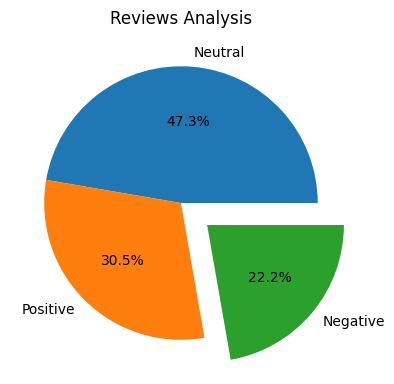

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values,labels=vader_counts.index,explode=(0,0,0.25),autopct='%1.1f%%',shadow=False)

In [77]:
df.to_csv("BritishAir_Reviews.csv")

# Word Cloud

A word cloud, also known as a tag cloud, is a visualization technique used to represent the most frequently occurring words in a text. It visually emphasizes words that appear more frequently by making them larger and more prominent in the cloud. Word clouds are commonly used to extract and visualize key themes, topics, or keywords from textual data, making it easier to identify patterns and trends.

In [78]:
pip install wordcloud

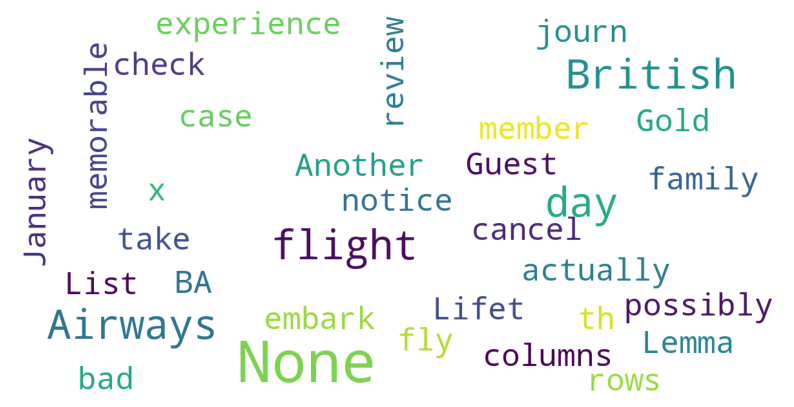

In [84]:
from wordcloud import WordCloud, STOPWORDS
stopwords=set(STOPWORDS)

def show_wordcloud(data):
  wordcloud = WordCloud(
      background_color='White',
      stopwords=stopwords,
      max_words=100,
      max_font_size=30,
      scale=3,
      random_state=1)
  wordcloud=wordcloud.generate(str(data))


  fig=plt.figure(1,figsize=(10,10))
  plt.axis('off')

  plt.imshow(wordcloud)
  plt.show

show_wordcloud(df[["Lemma"]])